<h2 align="center">
	Unitary Preparation of Tensor Network States
</h2>

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl

import sys
from os.path import dirname, abspath
sys.path.append('/home/mohsin/Documents/gh/gh_qsp/scr')

import quimb.tensor as qtn

from tsp_misc_tns import make_aklt_mps, make_splitted_mps
from tsp_misc_tns import make_aklt_peps

from tsp import MPSPreparation, PEPSPreparation

Given the requirements load/construct MPS of certiain size.

In [15]:
mps_type = 'aklt'#'heisenberg'#'heisenberg'#'random'#

if mps_type == 'aklt':
    tens, bond = make_aklt_mps(L=8)
    tens = make_splitted_mps(tens)
    target_mps = qtn.MatrixProductState(tens, shape='lrp')
    target_mps.normalize()
    
    
if mps_type == 'random':
    target_mps = qtn.MPS_rand_state(L=12, bond_dim=4)
    target_mps.permute_arrays(shape='lrp')
    
    
if mps_type in ['P4','N2','heisenberg']:
    filenames = {'P4': 'data/P4_6-31G_dist2.0000.pkl', 
                'N2': 'data/N2_STO-6G_dist2.0000.pkl',
                'heisenberg':'data/heisenberg_L32_dist0.8000.pkl'}
    
    with open(filenames[mps_type], 'rb') as f:
        data = pkl.load(f)
    
    target_mps = data['quimb_mps']
    target_mps.permute_arrays(shape='lpr')



<h2 align="center">
	Matrix Product States
</h2>
<h3 align="left">
	1. Sequential preparation
</h3>


$$
| \psi[A] \rangle \approx  (U_0. U_1. … U_D) |00...0\rangle
$$


where $D$ is the number of layers of unitaries $U_i$ (see [[1]], [[2]]).
 

[1]: https://arxiv.org/pdf/2209.07106.pdf
[2]: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.101.032310

In [16]:
prep = MPSPreparation(target_mps)
number_of_layers = 6
prep.seq_preparation(number_of_layers, do_compression=False)

100%|██████████| 6/6 [00:02<00:00,  2.41it/s]


overlap to target mps from constructed circuit = 0.8495559280824876
overlap from static seq. preparation = 0.84955585, n_gates=652, n_2qg=212


<h3 align="left">
	2. Variational optimization over sequentially prepared unitaries
</h3>

In [18]:
prep = MPSPreparation(target_mps)
number_of_layers = 3
n_iter, nhop = 40, 4
prep.variational_seq_preparation(number_of_layers, do_compression=False, n_iter=n_iter, nhop=nhop, verbose=False)

100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


overlap to target mps from constructed circuit = 0.8107108043958117
overlap from static seq. preparation = 0.81071080, n_gates=331, n_2qg=105

now doing variational optimization over gates


-0.889703869820 [best: -0.997903645039] : : 224it [15:36,  4.18s/it]                       



overlap to target mps from constructed circuit =  0.9979049491369049
overllap after variational optimization = 0.99790365,  n_gates=331, n_2qg=105


<h3 align="left">
	3. Quantum Circuit Tensor Network Ansatz
</h3>

In [19]:
prep = MPSPreparation(target_mps)
depth = 8
n_iter, nhop = 40, 4,
prep.qctn_preparation(depth, n_iter=n_iter, nhop=nhop)

number of gates in the circuit (from QCTN) are 264
overlap before optimization = -0.0007750548



-0.989840328693 [best: -0.989840328693] : : 224it [08:09,  2.19s/it]                       



overlap to target mps from constructed circuit =  0.9898419505275045
overllap after qctn optimization = 0.98984033,  n_gates=264, n_2qg=120


<h3 align="left">
	4. Preparation using Linear Combinition of unitaries (LCU)
</h3>

\begin{aligned}
	|\psi[A] \rangle = \left( U_0 + \kappa_1U_1 + \kappa_2U_2 + \dots\right)|00\dots0\rangle,
\end{aligned}

see [[1]] for details

[1]: https://arxiv.org/pdf/2209.07106.pdf


In [21]:
prep = MPSPreparation(target_mps)
number_of_lcu_layers = 4
prep.lcu_preparation(number_of_lcu_layers, verbose=False)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00,  4.12it/s]


[0.6157178138433612, (0.7803575271199081+0j)]
overllap after lcu. preparation = 0.78035753,  n_gates=3968, n_2qg=1648


<h3 align="left">
	5. Variational optimization over LCU preparation
</h3>

In [22]:
prep = MPSPreparation(target_mps)
number_of_lcu_layers = 4
prep.variational_lcu_preparation(number_of_lcu_layers, verbose=True)

100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


[0.6157178138433612, (0.7803575237752861+0j)]
overllap after lcu. preparation = 0.78035752,  n_gates=3922, n_2qg=1628
Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         -7.8035752377528611e-01    7.48425743e-02    
   2         -8.0203686458021373e-01    2.76781130e-02    
   3         -8.0611924744535579e-01    1.95864847e-02    
   4         -8.0967326863850697e-01    2.00921043e-02    
   5         -8.1235452858124102e-01    1.20819883e-02    
   6         -8.1424130156757857e-01    9.70159063e-03    
   7         -8.1563733575767272e-01    1.69066411e-02    
   8         -8.1686738268668357e-01    8.73323872e-03    
   9         -8.1717563834027451e-01    5.42850842e-03    
  10         -8.1735992559129578e-01    4.11569594e-03    
  11         -8.1754155088189562e-01    3.88079238e-03    
  12         -8.1774528934261326e-01    4.01725951e-03    
  13         -8.1785830737340515e-01    2.

<h3 align="left">
	6. Adiabatic state Preparation of MPS
</h3>

adiabatic state preparation of mps:
runtime=6, tau=0.04, steps=150, max_bond=2



100%|██████████| 151/151 [00:49<00:00,  3.03it/s]

final overlap @ s=1.00000 is e=0.00322278, curr_f=0.99799178, and target_fid=0.99799178



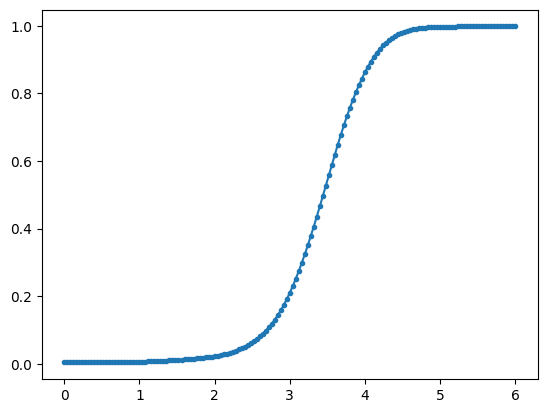

In [13]:
L = 8
tensor_array, _ = make_aklt_mps(L)
target_mps = qtn.MatrixProductState(tensor_array, shape='lrp')
prep = MPSPreparation(target_mps)

Tmax, tau = 6, 0.04 #total runtime, trotter step size
max_bond = 2
prep.adiabatic_state_preparation(Tmax, tau, max_bond, verbose=False)

plt.plot(prep.adiabatic_data['target_fidelity'].keys(), prep.adiabatic_data['target_fidelity'].values(), '.-')

<h2 align="center">
	PEPS (2D)
</h2>
<h3 align="left">
	1. Adiabatic state Preparation
</h3>

100%|██████████| 251/251 [2:02:07<00:00, 29.19s/it]  


2d adiabatic preparation: @ s=1.00000, e=0.00507427 and f=0.99095693



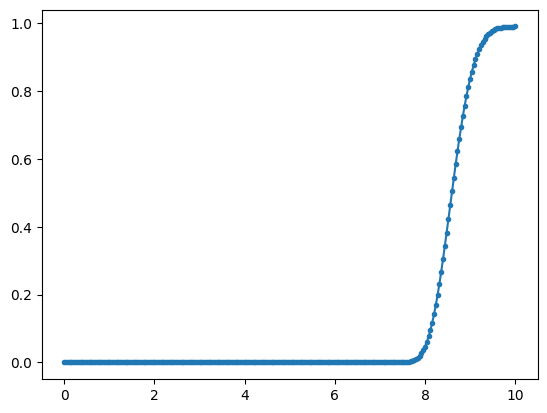

In [12]:
Lx, Ly = 10, 4
target_grid, _ = make_aklt_peps(Lx, Ly)
prep = PEPSPreparation(target_grid)

Tmax, tau = 10, 0.04
max_bond = 2
prep.adiabatic_state_preparation(Tmax, tau, max_bond, verbose=False)

plt.plot(prep.adiabatic_data['target_fidelity'].keys(), prep.adiabatic_data['target_fidelity'].values(), '.-')
